<a href="https://colab.research.google.com/github/maxidiazbattan/covid-vaccination-latinamerica/blob/main/covid_vaccinations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
import io
import json

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Set standard notation instead scientific

In [4]:
# Downloading the csv file from the OWID GitHub account
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv" 
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [5]:
# Downloading the csv file with the latitude and longitude of the world countries for a future choropleth map
lat_long = pd.read_html ('https://developers.google.com/public-data/docs/canonical/countries_csv')

In [6]:
# Changing the lat_long list into a numpy array and reshaping it
lat_long = np.array(lat_long)
lat_long = lat_long.reshape(-1, 4)

In [7]:
# Changing the lat_long array into a pandas dataframe 
df_lat_long = pd.DataFrame(lat_long, columns = ['country', 'latitude', 'longitude', 'location'])

In [8]:
# Changing the date format into datetime
df['date'] = pd.to_datetime (df['date'])

In [9]:
df['month'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [10]:
df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,month,year
0,Afghanistan,AFG,2021-02-22,0.00,0.00,nan,nan,nan,0.00,0.00,nan,nan,2,2021
1,Afghanistan,AFG,2021-02-23,nan,nan,nan,nan,1367.00,nan,nan,nan,35.00,2,2021
2,Afghanistan,AFG,2021-02-24,nan,nan,nan,nan,1367.00,nan,nan,nan,35.00,2,2021
3,Afghanistan,AFG,2021-02-25,nan,nan,nan,nan,1367.00,nan,nan,nan,35.00,2,2021
4,Afghanistan,AFG,2021-02-26,nan,nan,nan,nan,1367.00,nan,nan,nan,35.00,2,2021


In [11]:
# Grouping countries by location
df_loc = df.groupby('location', as_index = False).mean()

In [12]:
df_loc.sample(5)

,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,month,year
219,Uruguay,1908507.37,1230804.34,879000.96,32400.96,31665.72,54.94,35.43,25.30,9115.81,4.59,2021.00
53,Czechia,2712807.93,1847478.56,985682.33,45304.00,44488.17,25.33,17.25,9.20,4154.33,3.85,2020.97
48,Cote d'Ivoire,331154.18,331154.18,nan,7499.89,6208.80,1.26,1.26,nan,235.33,4.61,2021.00
76,Gambia,23797.17,21080.25,10867.67,nan,380.59,0.98,0.87,0.45,157.37,4.60,2021.00
143,Netherlands,5639666.85,3969070.19,2038849.83,nan,92977.77,32.91,23.16,11.90,5426.22,3.77,2021.00


In [13]:
la_countries = ['Argentina', 'Brazil', 'Bolivia', 'Chile', 'Colombia', 'Uruguay', 'Paraguay', 'Peru', 'Ecuador', 'Mexico']

In [14]:
# Checking if the countries on la_countries list, are present in the dataframe by a simple list comprehension
[country for country in df_loc['location'] if country in la_countries] 

['Argentina',
 'Bolivia',
 'Brazil',
 'Chile',
 'Colombia',
 'Ecuador',
 'Mexico',
 'Paraguay',
 'Peru',
 'Uruguay']

In [15]:
df_la = df[df['location'].isin(la_countries)]

In [16]:
df_lat_long[df_lat_long['location'].isin(la_countries)]

,country,latitude,longitude,location
10,AR,-38.42,-63.62,Argentina
27,BO,-16.29,-63.59,Bolivia
28,BR,-14.24,-51.93,Brazil
43,CL,-35.68,-71.54,Chile
46,CO,4.57,-74.30,Colombia
59,EC,-1.83,-78.18,Ecuador
153,MX,23.63,-102.55,Mexico
170,PE,-9.19,-75.02,Peru
182,PY,-23.44,-58.44,Paraguay
228,UY,-32.52,-55.77,Uruguay


In [17]:
df_la_group = df_la.groupby('location', as_index = False).mean().sort_values (by = 'people_fully_vaccinated_per_hundred', ascending = False)

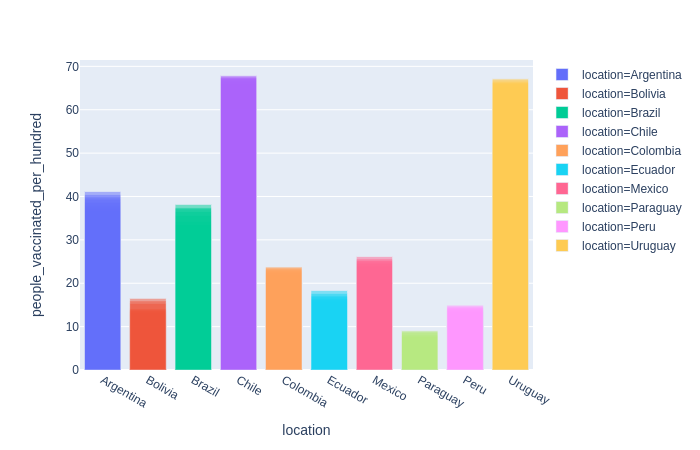

In [18]:
# Plotting the people vaccinated per hundred in latin american countries
g1 = px.bar (data_frame = df_la, x = 'location', y = 'people_vaccinated_per_hundred', color = 'location'  , barmode = 'overlay')
g1.show('png')

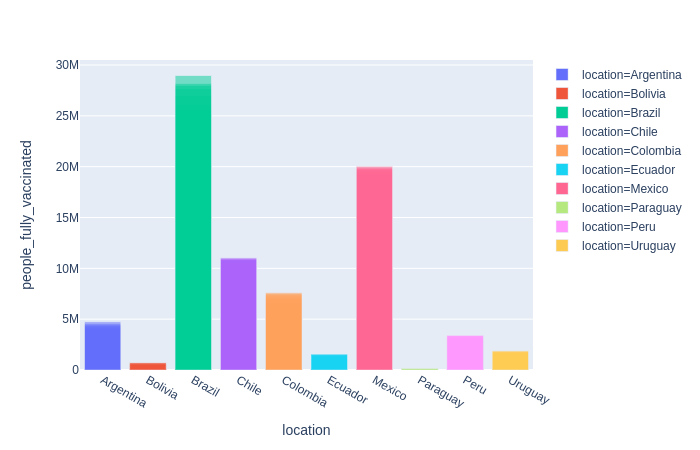

In [19]:
# People fully vaccinated in millions in latin american countries
g2 = px.bar (data_frame = df_la, x = 'location', y = 'people_fully_vaccinated', color = 'location', barmode = 'overlay')
g2.show('png')

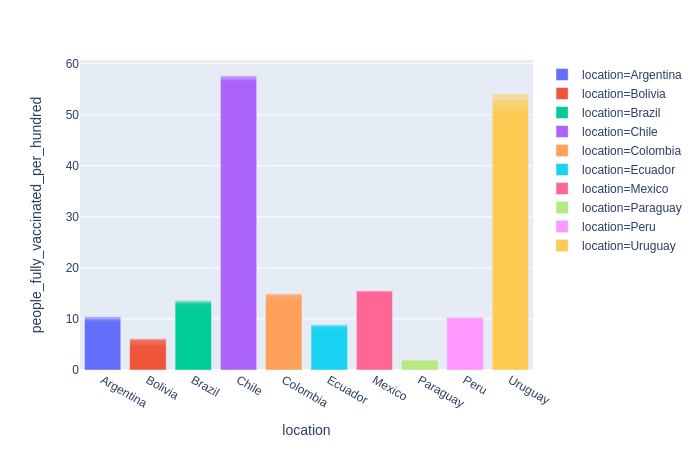

In [20]:
# People fully vaccinated per hundred in latin american countries
g3 = px.bar (data_frame = df_la, x = 'location', y = 'people_fully_vaccinated_per_hundred', color = 'location', barmode = 'overlay')
g3.show('png')

In [21]:
# Merging the data frames (df_la_group & df_lat_long) for a plotting purpouse
merge_dfs = pd.merge(df_la_group, df_lat_long, on = 'location' ) 
merge_dfs.head()

,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,month,year,country,latitude,longitude
0,Uruguay,1908507.37,1230804.34,879000.96,32400.96,31665.72,54.94,35.43,25.30,9115.81,4.59,2021.00,UY,-32.52,-55.77
1,Chile,10003108.37,5952657.27,4565624.33,121363.96,120030.47,52.33,31.14,23.88,6279.00,3.96,2020.96,CL,-35.68,-71.54
2,Brazil,34461609.43,24416135.05,11258011.58,603427.25,615397.31,16.21,11.49,5.30,2895.22,3.87,2021.00,BR,-14.24,-51.93
3,Colombia,6168099.45,5151853.44,2508447.61,130402.54,136323.96,12.12,10.12,4.93,2679.23,4.37,2021.00,CO,4.57,-74.30
4,Mexico,14405185.63,10662192.09,6314410.76,258871.32,242870.02,11.17,8.27,4.90,1883.71,3.96,2020.96,MX,23.63,-102.55


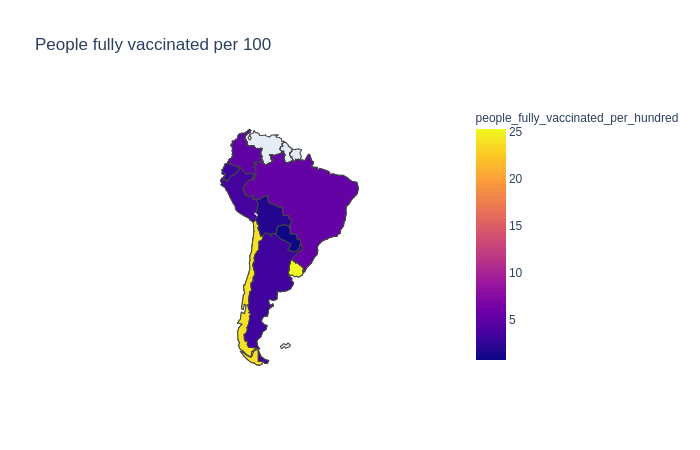

In [22]:
# A choropleth map of the people fully vaccinated in LA 
g4 = px.choropleth (data_frame = merge_dfs, locations = 'location', locationmode = 'country names', 
                    color = 'people_fully_vaccinated_per_hundred', scope = 'south america', title = 'People fully vaccinated per 100')
g4.show('png')

In [23]:
# Grouping the initial data frame by location
df_group =  df.groupby('location', as_index = False).mean().sort_values (by = 'people_fully_vaccinated_per_hundred', ascending = False)
df_group.head()

,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,month,year
80,Gibraltar,42626.91,24646.95,21687.41,751.31,466.31,126.52,73.16,64.37,13840.69,3.68,2021.00
70,Falkland Islands,2360.50,1778.50,1746.00,nan,74.74,67.77,51.06,50.13,21459.42,2.88,2021.00
100,Israel,7937747.55,4348042.56,3900165.97,54412.82,54475.84,91.71,50.23,45.06,6293.75,4.18,2020.94
215,United Arab Emirates,8385308.29,5247378.00,4227164.67,84053.28,80909.90,84.78,53.05,42.74,8180.63,3.70,2021.00
38,Cayman Islands,56852.13,32363.19,26146.69,670.68,490.90,86.51,49.24,39.78,7469.43,3.90,2020.97


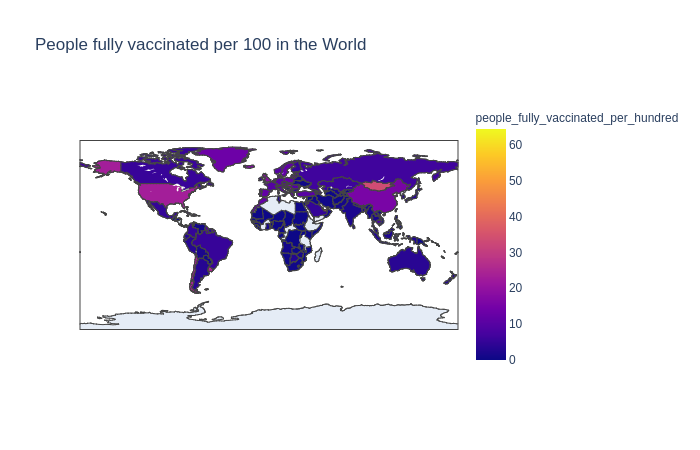

In [24]:
# A choropleth map of the people fully vaccinated in the World
g5 = px.choropleth (data_frame = df_group, locations = 'location', locationmode = 'country names', 
                    color = 'people_fully_vaccinated_per_hundred', scope = 'world', title = 'People fully vaccinated per 100 in the World')
g5.show('png')